In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import random

import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
from scipy.stats import skew
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier

import shap
import os
import warnings
warnings.filterwarnings('ignore')

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
cols = [
    'tourney_id', 
    'tourney_name', 
    'surface', 
    'draw_size', 
    'tourney_level',
    'tourney_date', 
    'match_num', 
    'winner_id', 
    'winner_seed', 
    'winner_entry',
    'winner_name',
    'winner_hand', 
    'winner_ht', 
    'winner_ioc', 
    'winner_age', 
    'winner_rank', 
    'winner_rank_points', 
    'loser_id',
    'loser_seed',
    'loser_entry',
    'loser_name',
    'loser_hand',
    'loser_ht',
    'loser_ioc',
    'loser_age',
    'loser_rank',
    'loser_rank_points',
    'score',
    'best_of', 
    'round',
    'minutes', 
    'w_ace', 
    'w_df', 
    'w_svpt',
    'w_1stIn', 
    'w_1stWon', 
    'w_2ndWon',
    'w_SvGms', 
    'w_bpSaved', 
    'w_bpFaced',
    'l_ace',
    'l_df',
    'l_svpt',
    'l_1stIn',
    'l_1stWon',
    'l_2ndWon',
    'l_SvGms',
    'l_bpSaved',
    'l_bpFaced'
]

In [4]:
df = pd.concat([
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1968.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1969.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1970.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1971.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1972.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1973.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1974.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1975.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1976.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1977.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1978.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1979.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1980.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1981.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1982.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1983.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1984.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1985.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1986.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1987.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1988.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1989.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1990.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1991.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1992.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1993.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1994.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1995.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1996.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1997.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1998.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_1999.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2000.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2001.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2002.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2003.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2004.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2005.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2006.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2007.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2008.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2009.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2010.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2011.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2012.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2013.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2014.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2015.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2016.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2017.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2019.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2020.csv', usecols=cols),
    pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2021.csv', usecols=cols),
	pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2022.csv', usecols=cols),
	pd.read_csv('../input/tennis-atp-dataset-19682024/atp_matches_2023.csv', usecols=cols),

],ignore_index=True)

df.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
189018,2023-M-DC-2023-WG2-PO-RSA-LUX-01,Davis Cup WG2 PO: RSA vs LUX,NaN,4.0,D,20230204,5,202335,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1717.0,1.0
189019,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4.0,D,20230203,1,117365,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,990.0,11.0,279.0,190.0
189020,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4.0,D,20230203,2,121411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,364.0,131.0,894.0,15.0
189021,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4.0,D,20230203,4,144949,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,894.0,15.0,285.0,184.0
189022,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4.0,D,20230203,5,121411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,364.0,131.0,990.0,11.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189023 entries, 0 to 189022
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          189023 non-null  object 
 1   tourney_name        189023 non-null  object 
 2   surface             186033 non-null  object 
 3   draw_size           188188 non-null  float64
 4   tourney_level       189023 non-null  object 
 5   tourney_date        189023 non-null  int64  
 6   match_num           189023 non-null  int64  
 7   winner_id           189023 non-null  int64  
 8   winner_seed         69786 non-null   float64
 9   winner_entry        16319 non-null   object 
 10  winner_name         189023 non-null  object 
 11  winner_hand         189013 non-null  object 
 12  winner_ht           172144 non-null  float64
 13  winner_ioc          189015 non-null  object 
 14  winner_age          187713 non-null  float64
 15  loser_id            189023 non-nul

In [6]:
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

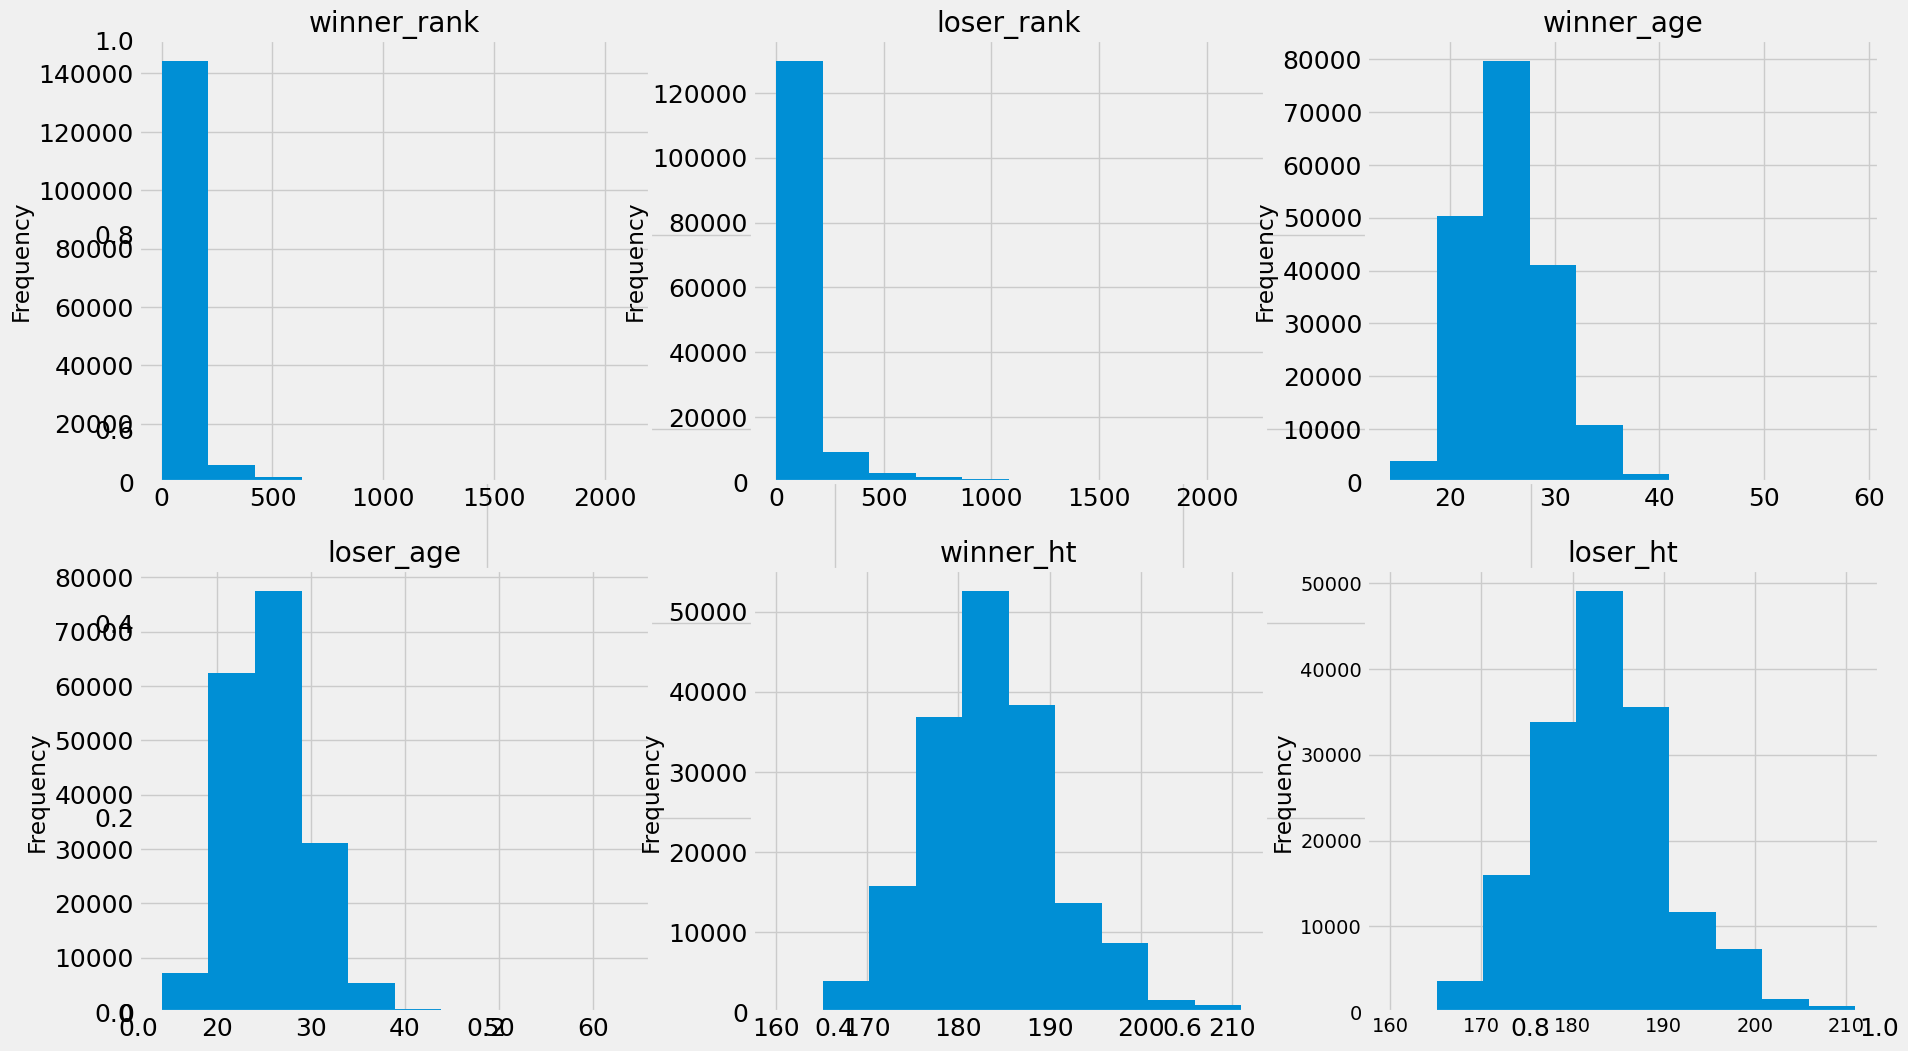

In [7]:
dimensions = ['winner_rank','loser_rank','winner_age','loser_age','winner_ht','loser_ht']

plt.figure(1, figsize=(20,12))

for i in range(1,7):
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.subplot(2,3,i)
    df[dimensions[i-1]].plot(kind='hist', title=dimensions[i-1])


Text(0.5, 1.0, '10 Top players')

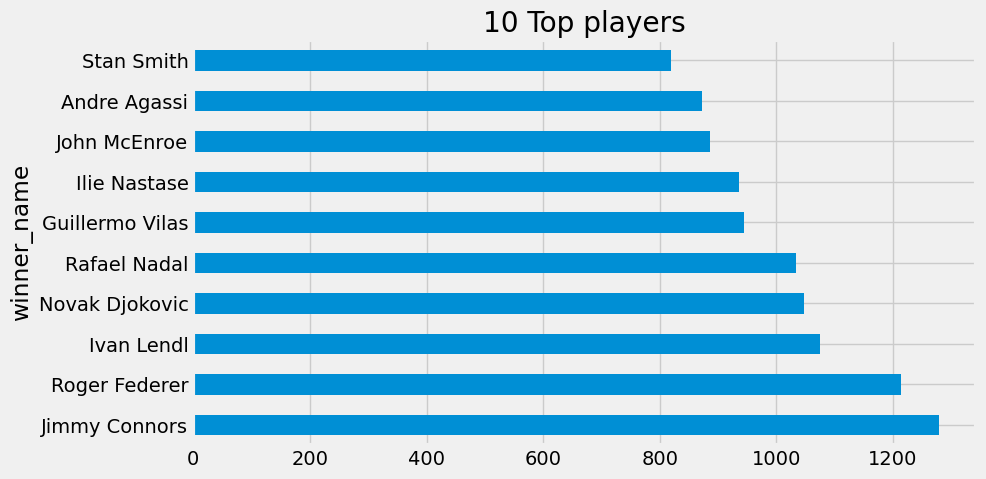

In [8]:
plt.figure(figsize=(9,5))
df['winner_name'].value_counts()[:10].plot(kind='barh')
plt.title('10 Top players')

<Axes: >

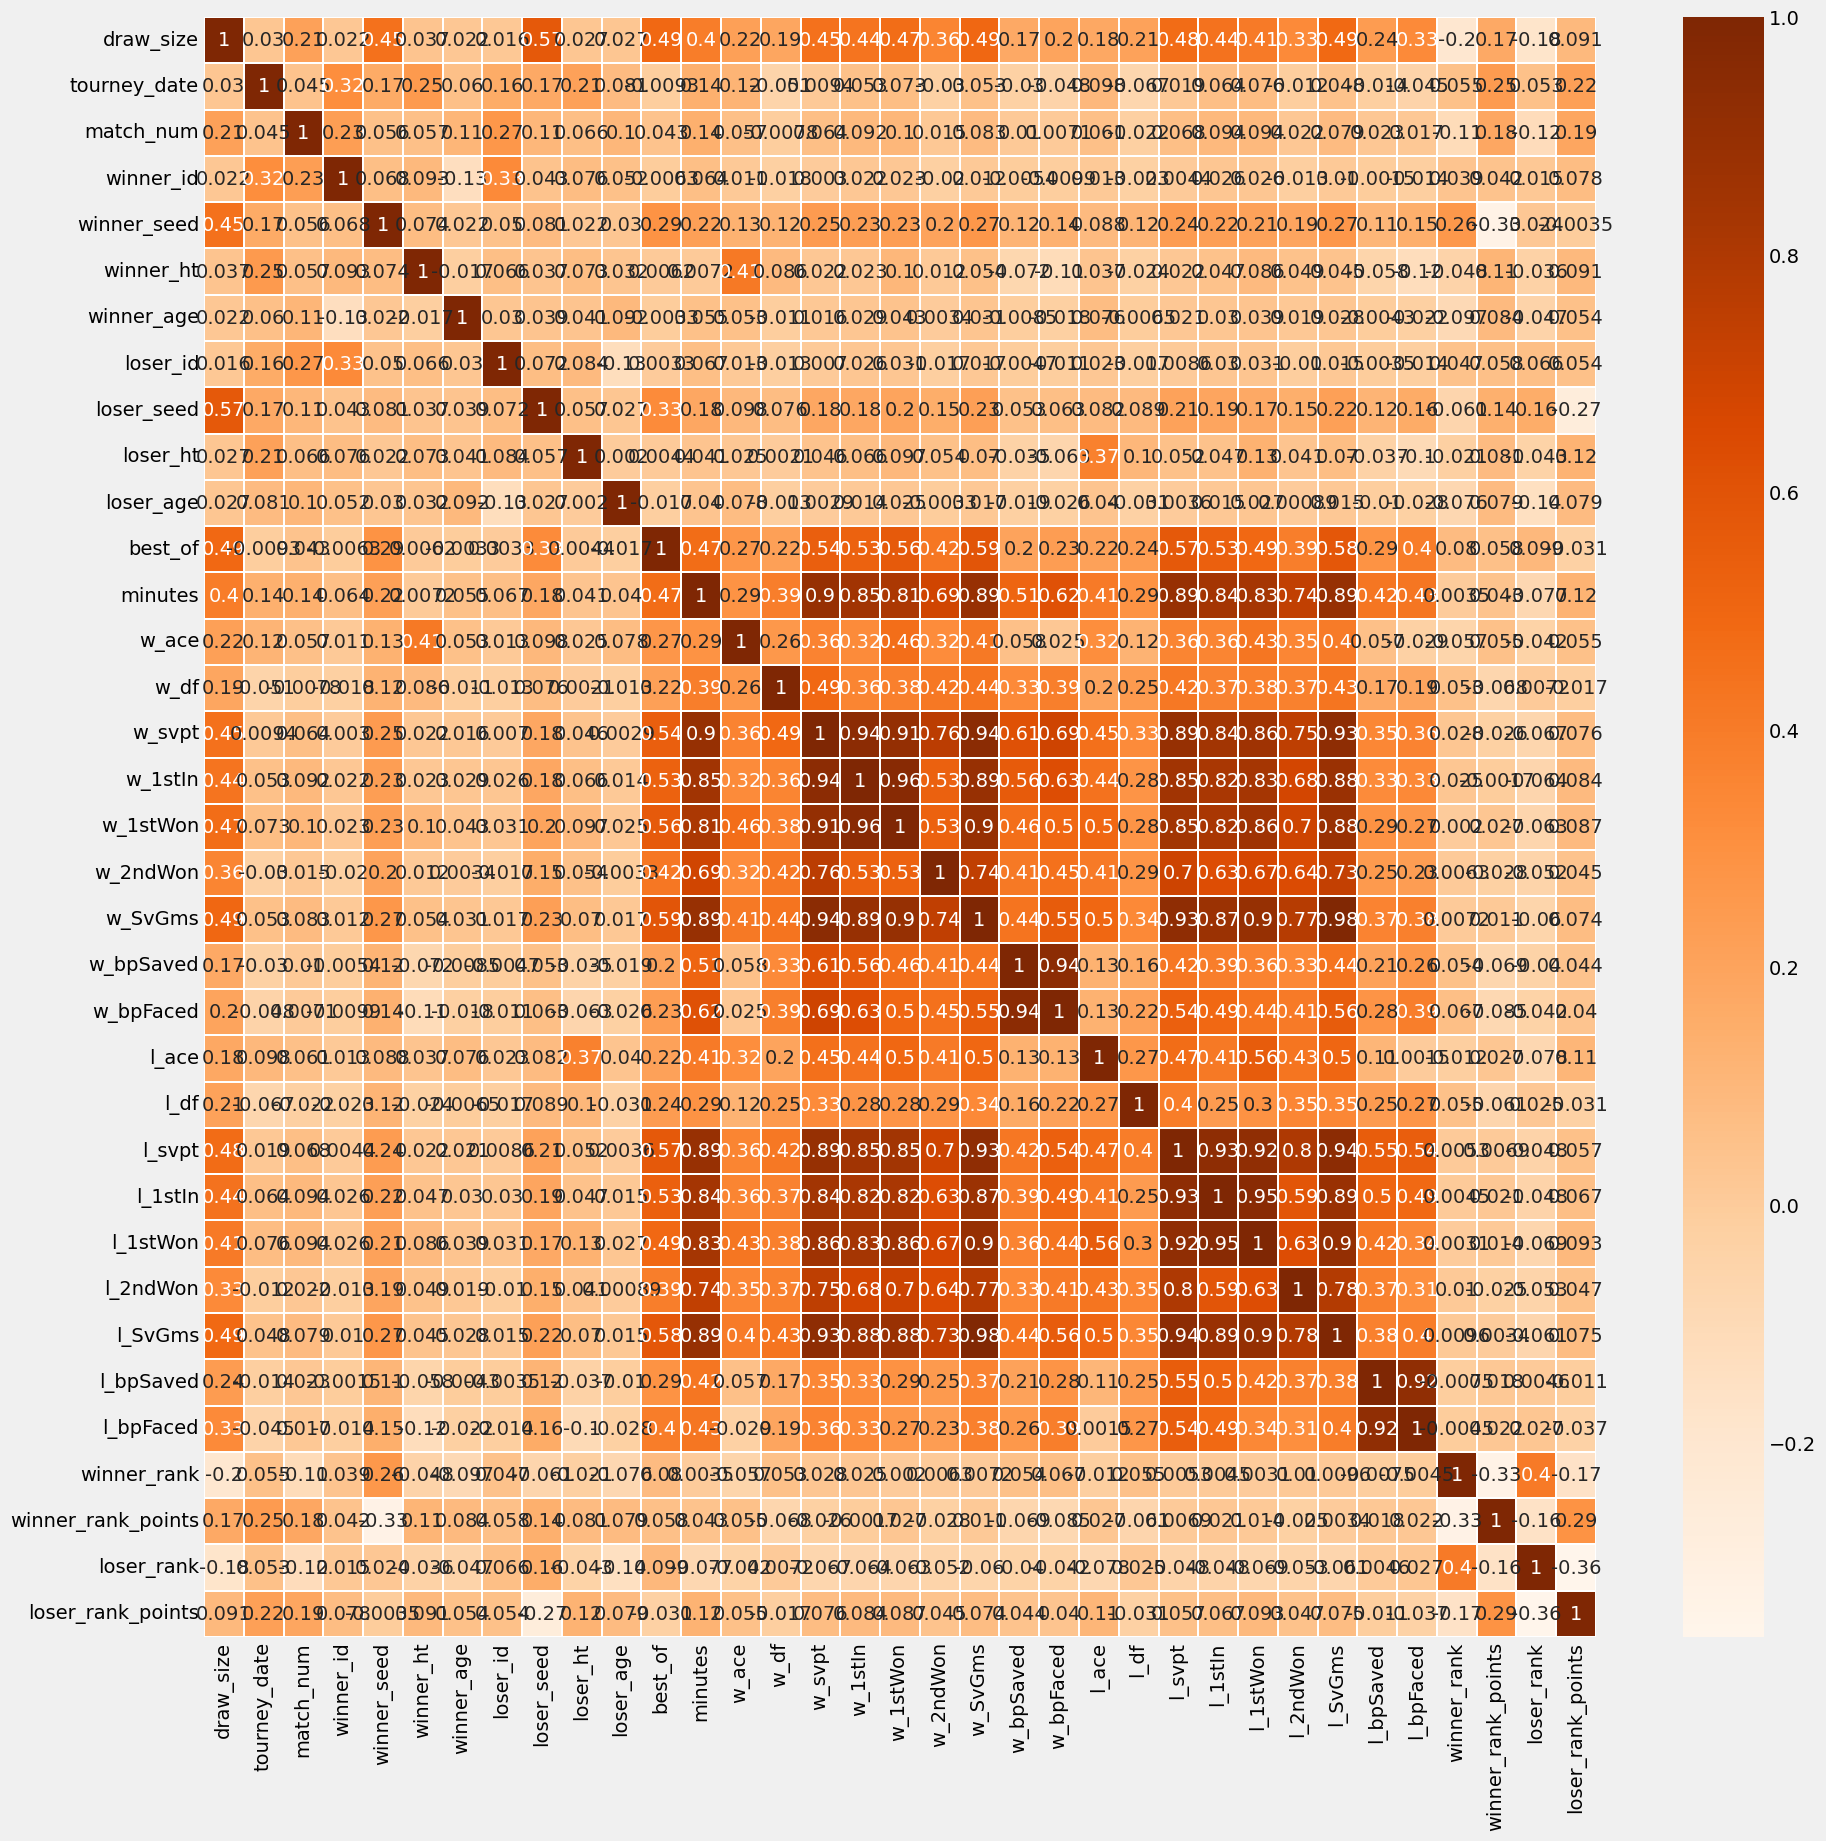

In [9]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot= True, linewidth=0.1, cmap= 'Oranges')

In [10]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32.0,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32.0,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32.0,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32.0,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-2029,Dublin,Grass,32.0,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df = df.drop(columns=['score','tourney_name','winner_name',
                      'loser_name','minutes', 'l_1stIn', 'l_1stWon', 'l_2ndWon','l_ace', 'l_svpt',
                      'l_SvGms','l_bpFaced','l_df', 'l_bpSaved',  'w_1stIn', 'w_1stWon','w_2ndWon', 'w_SvGms',
                      'w_ace', 'w_svpt','w_bpFaced', 'w_bpSaved','w_df'])
print("remained features ", df.columns)

remained features  Index(['tourney_id', 'surface', 'draw_size', 'tourney_level', 'tourney_date',
       'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age',
       'best_of', 'round', 'winner_rank', 'winner_rank_points', 'loser_rank',
       'loser_rank_points'],
      dtype='object')


In [12]:
none_percent = df.isnull().sum() * 100 / len(df)
none_values_df = pd.DataFrame({'Feature name': df.columns, 'None values count': df.isnull().sum(),
                                 'None values percent': none_percent})
print(none_values_df.reset_index().drop(columns=['index']))

          Feature name  None values count  None values percent
0           tourney_id                  0             0.000000
1              surface               2990             1.581818
2            draw_size                835             0.441745
3        tourney_level                  0             0.000000
4         tourney_date                  0             0.000000
5            match_num                  0             0.000000
6            winner_id                  0             0.000000
7          winner_seed             119237            63.080683
8         winner_entry             172704            91.366659
9          winner_hand                 10             0.005290
10           winner_ht              16879             8.929601
11          winner_ioc                  8             0.004232
12          winner_age               1310             0.693037
13            loser_id                  0             0.000000
14          loser_seed             153635            81

In [13]:
features_to_remove = none_values_df[none_values_df["None values percent"] > 85]
print(features_to_remove)
df = df.drop(columns=features_to_remove['Feature name'].values)

              Feature name  None values count  None values percent
winner_entry  winner_entry             172704            91.366659
loser_entry    loser_entry             161259            85.311840


In [14]:
df.dropna(subset=['winner_rank_points', 'loser_rank_points','winner_rank','loser_rank'], inplace=True)
df = df.reset_index(drop=True)
df

,tourney_id,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_hand,winner_ht,...,loser_hand,loser_ht,loser_ioc,loser_age,best_of,round,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1973-2045,NaN,32.0,A,19731021,271,100156,NaN,R,NaN,...,R,NaN,AUS,24.5,3,R32,174.0,0.0,123.0,0.0
1,1973-2045,NaN,32.0,A,19731021,276,100051,NaN,R,NaN,...,R,183.0,USA,23.2,3,R32,105.0,0.0,189.0,0.0
2,1973-2045,NaN,32.0,A,19731021,279,100205,NaN,R,185.0,...,R,NaN,CRO,26.3,3,R32,42.0,0.0,77.0,0.0
3,1973-2045,NaN,32.0,A,19731021,285,100270,NaN,R,185.0,...,R,188.0,AUS,23.7,3,R32,179.0,0.0,199.0,0.0
4,1973-2045,NaN,32.0,A,19731021,286,100030,NaN,R,190.0,...,R,193.0,USA,24.0,3,R16,40.0,0.0,90.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103706,2023-M-DC-2023-WG2-PO-RSA-LUX-01,NaN,4.0,D,20230204,4,200270,NaN,R,NaN,...,U,NaN,RSA,26.3,3,RR,608.0,48.0,516.0,67.0
103707,2023-M-DC-2023-WG2-PO-TUN-CYP-01,NaN,4.0,D,20230203,1,117365,NaN,R,185.0,...,R,NaN,TUN,27.5,3,RR,990.0,11.0,279.0,190.0
103708,2023-M-DC-2023-WG2-PO-TUN-CYP-01,NaN,4.0,D,20230203,2,121411,NaN,R,180.0,...,R,NaN,CYP,23.9,3,RR,364.0,131.0,894.0,15.0
103709,2023-M-DC-2023-WG2-PO-TUN-CYP-01,NaN,4.0,D,20230203,4,144949,NaN,R,NaN,...,L,188.0,TUN,25.8,3,RR,894.0,15.0,285.0,184.0


In [15]:
numeric_columns = ['winner_rank', 'loser_rank', 'winner_age', 'loser_age', 'winner_ht', 'loser_ht']
df[numeric_columns] = df[numeric_columns].astype(float)

In [16]:
df.tourney_date

0         19731021
1         19731021
2         19731021
3         19731021
4         19731021
            ...   
103706    20230204
103707    20230203
103708    20230203
103709    20230203
103710    20230203
Name: tourney_date, Length: 103711, dtype: int64

In [17]:
df['tourney_year'] = df.tourney_date.astype(str).str[:4].astype(int)
df['tourney_month'] = df.tourney_date.astype(str).str[4:6].astype(int)
df = df.drop(columns=['tourney_date'])

In [18]:
df = df.rename(columns={"loser_age": "first_age", "loser_entry": "first_entry", "loser_hand": "first_hand",
                        "loser_ht": "first_ht", "loser_id": "first_id", "loser_ioc": "first_ioc",
                        "loser_rank": "first_rank", "loser_rank_points": "first_rank_points",
                        "loser_seed": "first_seed",
                
                        "winner_age": "second_age", "winner_entry": "second_entry","winner_hand": "second_hand",
                        "winner_ht": "second_ht", "winner_id": "second_id", "winner_ioc": "second_ioc",
                        "winner_rank": "second_rank", "winner_rank_points": "second_rank_points",
                        "winner_seed": "second_seed",
                       },)

In [19]:
copy_2_df = df.copy()
copy_2_df[[ 'first_age','first_hand','first_ht','first_id','first_ioc','first_rank','first_rank_points','first_seed',
            'second_age','second_hand','second_ht','second_id','second_ioc','second_rank','second_rank_points','second_seed']]\
=copy_2_df[['second_age','second_hand','second_ht','second_id','second_ioc','second_rank','second_rank_points','second_seed',
             'first_age','first_hand','first_ht','first_id','first_ioc','first_rank','first_rank_points','first_seed']]

In [20]:
winner_player2 = np.zeros(df.shape[0])
df['label'] = winner_player2


winner_player1 = np.ones(copy_2_df.shape[0])
copy_2_df['label'] = winner_player1 

df = pd.concat([df,copy_2_df])
df = df.sample(frac=1).reset_index(drop=True)
df

,tourney_id,surface,draw_size,tourney_level,match_num,second_id,second_seed,second_hand,second_ht,second_ioc,...,first_age,best_of,round,second_rank,second_rank_points,first_rank,first_rank_points,tourney_year,tourney_month,label
0,2021-1536,Clay,64.0,M,293,200615,NaN,R,196.0,AUS,...,34.9,3,R16,76.0,949.0,2.0,9810.0,2021,5,1.0
1,2003-410,Clay,64.0,M,5,102374,12.0,R,180.0,ESP,...,21.5,3,R64,16.0,1485.0,59.0,682.0,2003,4,1.0
2,2009-560,Hard,128.0,G,113,103990,14.0,R,180.0,ESP,...,28.0,5,R16,15.0,2165.0,1.0,12040.0,2009,8,1.0
3,2014-495,Hard,32.0,A,19,103285,NaN,R,185.0,CZE,...,32.5,3,R16,48.0,925.0,8.0,4305.0,2014,2,1.0
4,2013-6718,Hard,28.0,A,18,104997,3.0,R,190.0,NED,...,34.3,3,R16,55.0,842.0,155.0,355.0,2013,7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207417,2014-422,Hard,56.0,M,31,103898,NaN,R,185.0,FRA,...,27.5,3,R32,41.0,1015.0,148.0,383.0,2014,8,0.0
207418,2023-2841,Clay,32.0,A,300,105583,NaN,R,180.0,SRB,...,25.4,3,F,70.0,744.0,6.0,4380.0,2023,4,0.0
207419,2021-9512,Clay,32.0,A,299,105413,NaN,R,180.0,SVK,...,34.0,3,SF,119.0,673.0,1.0,11063.0,2021,5,1.0
207420,2015-D013,Hard,4.0,D,4,104918,NaN,R,190.0,GBR,...,22.8,5,RR,3.0,8660.0,23.0,1510.0,2015,9,0.0


In [21]:
hand_encoder = LabelEncoder()
df['first_hand'] = hand_encoder.fit_transform(df['first_hand'].astype(str))
df['second_hand'] = hand_encoder.transform(df['second_hand'].astype(str))

df['first_ioc'] = LabelEncoder().fit_transform(df['first_ioc'].astype(str))
df['second_ioc'] = LabelEncoder().fit_transform(df['second_ioc'].astype(str))

df['surface'] = LabelBinarizer().fit_transform(df['surface'].astype(str))
df['tourney_level'] = LabelEncoder().fit_transform(df['tourney_level'].astype(str))
df['tourney_id'] = LabelEncoder().fit_transform(df['tourney_id'].astype(str))
df['round'] = LabelEncoder().fit_transform(df['round'].astype(str))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207422 entries, 0 to 207421
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          207422 non-null  int32  
 1   surface             207422 non-null  int32  
 2   draw_size           207422 non-null  float64
 3   tourney_level       207422 non-null  int32  
 4   match_num           207422 non-null  int64  
 5   second_id           207422 non-null  int64  
 6   second_seed         66234 non-null   float64
 7   second_hand         207422 non-null  int32  
 8   second_ht           202220 non-null  float64
 9   second_ioc          207422 non-null  int32  
 10  second_age          207361 non-null  float64
 11  first_id            207422 non-null  int64  
 12  first_seed          66234 non-null   float64
 13  first_hand          207422 non-null  int32  
 14  first_ht            202220 non-null  float64
 15  first_ioc           207422 non-nul

In [22]:
df.head()

,tourney_id,surface,draw_size,tourney_level,match_num,second_id,second_seed,second_hand,second_ht,second_ioc,...,first_age,best_of,round,second_rank,second_rank_points,first_rank,first_rank_points,tourney_year,tourney_month,label
0,4220,0,64.0,4,293,200615,NaN,2,196.0,5,...,34.9,3,5,76.0,949.0,2.0,9810.0,2021,5,1.0
1,1931,0,64.0,4,5,102374,12.0,2,180.0,32,...,21.5,3,7,16.0,1485.0,59.0,682.0,2003,4,1.0
2,2816,0,128.0,3,113,103990,14.0,2,180.0,32,...,28.0,5,5,15.0,2165.0,1.0,12040.0,2009,8,1.0
3,3496,0,32.0,0,19,103285,NaN,2,185.0,26,...,32.5,3,5,48.0,925.0,8.0,4305.0,2014,2,1.0
4,3377,0,28.0,0,18,104997,3.0,2,190.0,72,...,34.3,3,5,55.0,842.0,155.0,355.0,2013,7,1.0


In [23]:
df_imputed = pd.DataFrame(SimpleImputer().fit_transform(df))
df_imputed.columns = df.columns
df_imputed.index = df.index
df = df_imputed.copy()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207422 entries, 0 to 207421
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          207422 non-null  float64
 1   surface             207422 non-null  float64
 2   draw_size           207422 non-null  float64
 3   tourney_level       207422 non-null  float64
 4   match_num           207422 non-null  float64
 5   second_id           207422 non-null  float64
 6   second_seed         207422 non-null  float64
 7   second_hand         207422 non-null  float64
 8   second_ht           207422 non-null  float64
 9   second_ioc          207422 non-null  float64
 10  second_age          207422 non-null  float64
 11  first_id            207422 non-null  float64
 12  first_seed          207422 non-null  float64
 13  first_hand          207422 non-null  float64
 14  first_ht            207422 non-null  float64
 15  first_ioc           207422 non-nul

In [25]:
print('Final shape of data after cleaning and preprocessing: ', df.shape)

Final shape of data after cleaning and preprocessing:  (207422, 26)


In [26]:
y = df['label']
df_X = df.drop(columns='label')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.25)

In [28]:
RF_classifier = RandomForestClassifier(n_estimators=100)

RF_classifier.fit(X_train, y_train)

RF_predictions = RF_classifier.predict(X_test)

In [29]:
print('Confusion matrix')
print(confusion_matrix(y_test,RF_predictions))
print('Classification report')
print(classification_report(y_test,RF_predictions))
print('Accuracy= ', accuracy_score(y_test, RF_predictions))

Confusion matrix
[[16939  8844]
 [ 9686 16387]]
Classification report
              precision    recall  f1-score   support

         0.0       0.64      0.66      0.65     25783
         1.0       0.65      0.63      0.64     26073

    accuracy                           0.64     51856
   macro avg       0.64      0.64      0.64     51856
weighted avg       0.64      0.64      0.64     51856

Accuracy=  0.642664301141623


In [30]:
XGB_classifier = XGBClassifier()

XGB_classifier.fit(X_train, y_train)

XGB_predictions = XGB_classifier.predict(X_test)

In [31]:
print('Confusion matrix')
print(confusion_matrix(y_test,XGB_predictions))
print('Classification report')
print(classification_report(y_test,XGB_predictions))
print('Accuracy= ', accuracy_score(y_test, XGB_predictions))

Confusion matrix
[[16954  8829]
 [ 9016 17057]]
Classification report
              precision    recall  f1-score   support

         0.0       0.65      0.66      0.66     25783
         1.0       0.66      0.65      0.66     26073

    accuracy                           0.66     51856
   macro avg       0.66      0.66      0.66     51856
weighted avg       0.66      0.66      0.66     51856

Accuracy=  0.6558739586547362


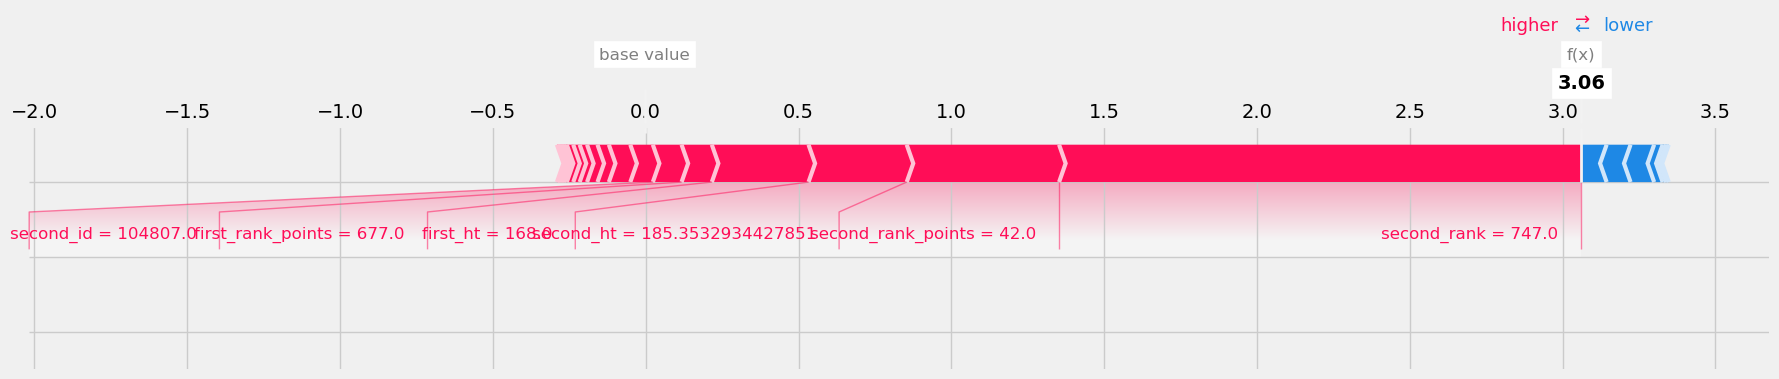

In [32]:
shap.initjs()
explainer = shap.TreeExplainer(XGB_classifier)
shap_values = explainer.shap_values(X_train)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:], matplotlib=True)

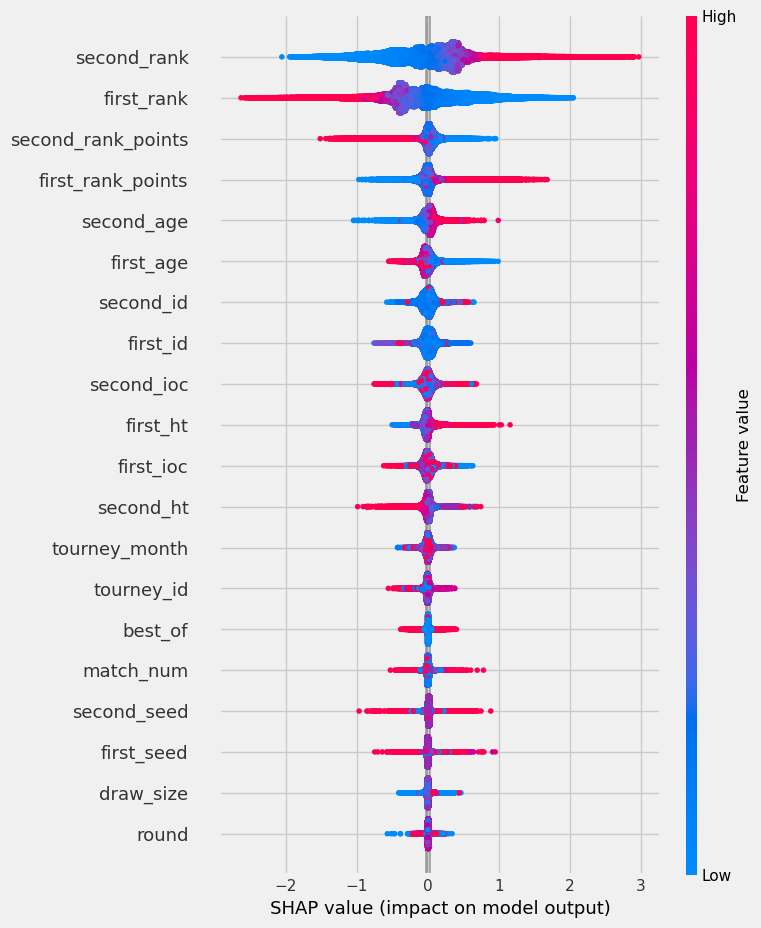

In [33]:
shap.summary_plot(shap_values, X_train)

In [34]:
print("Hello World")

Hello World
